**IMPORTATION DES DONNEES**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

# récupération des données nécessaires au Word Cloud
data = pd.read_pickle('/content/drive/My Drive/Projet Info Grand débat/grand_debat_data.pk1')[["id","question","tokens","parent"]]

**GENERATION D'UN NUAGE DE MOTS**

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# un doc ou document est une reponse libre

def genWordCloud(data: list, nbr_mots=30, width=800, height=400):
    """ revoie une image word cloud avec les nbr_mots mots les plus fréquents dans data.
        data: une liste de Strings telle que chaque string représente un document = une reponse libre
        nbr_mots: le nombre de mots que l'on souhaite afficher sur le word cloud
        width & height: taille de l'image voulu
    """

    # On passe les données dans le vectorizer de sklearn :
    vectorizer = TfidfVectorizer(min_df=1)
    vectorizer.fit_transform(data) # matrice (lignes tous les docs, colonnes tous les mots) des TF IDF

    words = vectorizer.get_feature_names() # On récupère la liste de mots
    idf = vectorizer.idf_ # On récupère la liste des IDFs
    
    
    index = np.argpartition(idf, nbr_mots)[:nbr_mots] # On récupère les indices des IDF les plus petits
    freq = np.take(idf, index)
    freq = 1 - freq / sum(freq)  # on pondère les mots inversements à leur IDF
    
    d = dict(zip(np.take(words, index), freq)) # on fait un dictionnaire avec pour chaque mot sa pondération
    
    return WordCloud(width=width, height=height).generate_from_frequencies(d) # On retourne une image WordCloud


**GENERER UN NUAGE DE MOTS A PARTIR DES REPONSES A UNE QUESTION**

In [0]:
# Affichage de la liste des quesitons et de leurs id pour aider à la selection
for qid in pd.unique(data.id):
    print(qid, ":", data[data.id==qid].question.iloc[0])

107.0 : En qui faites-vous le plus confiance pour vous faire représenter dans la société et pourquoi ?
145.0 : Y a-t-il d'autres points sur la démocratie et la citoyenneté sur lesquels vous souhaiteriez vous exprimer ?
110.0 : Que faudrait-il faire pour renouer le lien entre les citoyens et les élus qui les représentent ?
119.0 : Que faudrait-il faire aujourd'hui pour mieux associer les citoyens aux grandes orientations et à la décision publique ? Comment mettre en place une démocratie plus participative ?
116.0 : Que pensez-vous de la participation des citoyens aux élections et comment les inciter à y participer davantage ?
122.0 : Que faudrait-il faire pour consulter plus directement les citoyens sur l'utilisation de l'argent public, par l'Etat et les collectivités ?
109.0 : Si oui, à quel type d'associations ou d'organisations ? Et avec quel rôle ?
112.0 : Pourquoi ?
113.0 : Que faudrait-il faire pour mieux représenter les différentes sensibilités politiques ?
115.0 : Si oui, lesque

**SELECTIONNER UN INDICE DE QUESTION A PARTIR DE LA LISTE CI-DESSUS**

In [0]:
qID_selected = 160

In [0]:
# On transforme la liste des listes de tokens en liste de string
treated_Text = data[data.id==qID_selected].tokens.apply(lambda x: ' '.join(x)).to_list()

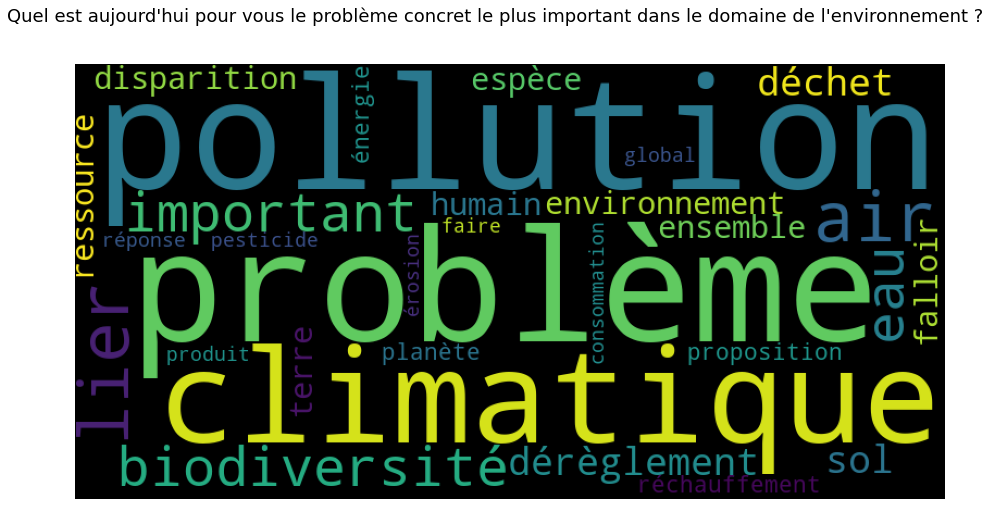

In [0]:
question_name = str(data[data.id==qID_selected].question.iloc[0])

wc = genWordCloud(treated_Text) # On génère l'image
plt.figure(figsize=(16, 8))
plt.axis("off")
plt.suptitle(question_name[:115]+"\n"+question_name[115:], fontsize=18) # title
plt.imshow(wc) 
#plt.savefig("/content/drive/My Drive/Projet Info Grand débat/{0}.png".format(question_name))


**GENERER UN NUAGE DE MOTS A PARTIR D'UN DES 4 GRANDS THEMES**

**SELECTIONNER UN GRAND THEME**

In [0]:
theme_selected = 'fiscalite'

In [0]:
# On transforme la liste des listes de tokens en liste de string
treated_Text = data[data.parent==theme_selected].tokens.apply(lambda x: ' '.join(x)).to_list()

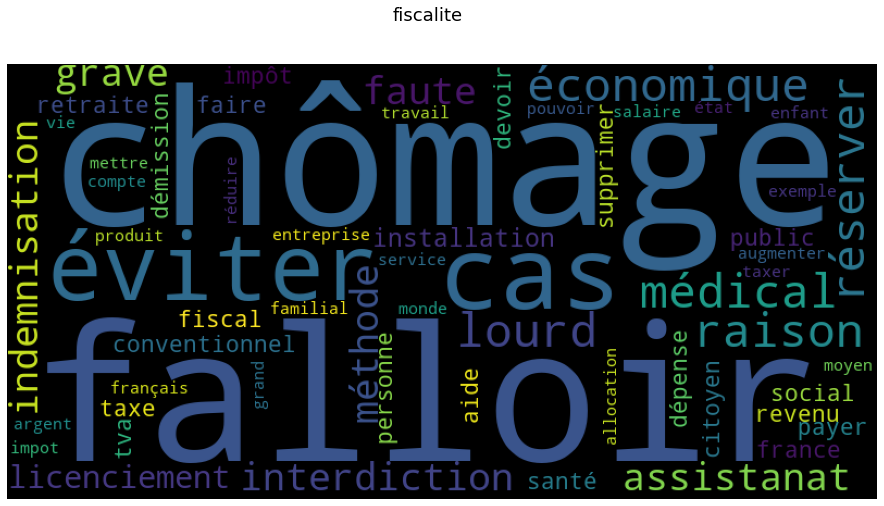

In [0]:
wc = genWordCloud(treated_Text,nbr_mots=60) # On génère l'image
plt.figure(figsize=(16, 8))
plt.axis("off")
plt.suptitle(theme_selected, fontsize=18) # title
plt.imshow(wc) 
#plt.savefig("/content/drive/My Drive/Projet Info Grand débat/{0}.png".format(theme_selected))